# Exercise 8: Introduction to SymPy

SymPy is a Python package for symbolic computation. Instead of working only with variable values (as we did before in our programming exercises), in symbolic computation we actually work with mathematical objects, for example symbolic descriptions of functions. This enables us to do incredible things: we can, for example, use symbolic computations to perform complicated differentiation or integration operations symbolically! If you used Mathematica or Maple before, then you are probably familiar with this type of computation. 

Here a description from the [SymPy homepage](http://docs.sympy.org/dev/tutorial/intro.html):

> "Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form."

 

You might not be impressed - but wait and see...

## Taylor series expansion

We will first discuss the Taylor series expansion as a way to formally determine the differential of a property. As a brief reminder, the Taylor series can be used to approximate the value of a function $f(x)$ at a location $f(x +h)$ with the help of a polynomial series:

$$f(x+h) = \sum_{i=1}^n \frac{h^n}{n!} \frac{d^nf}{dx^n}(h)$$

As an example, we can approximate the sine function at several locations. This is pretty easy as the derivatives of $f(x) = \sin(x)$ can easily be calculated.

However, this is not always the case. Think about a tiny bit more complex function: $f(x) = \sin(x^2)$. Determining higher-order differentials quickly gets quite tricky (i.e. dirty) - try it out, to convince yourself:

$$f(x) = \sin(x^2)$$

$$\frac{df}{dx} = 2x \cos(x^2)$$

$$\frac{d^2f}{dx^2} = ?$$

$$\frac{d^3f}{dx^3} = ??$$

Creating more differentials is a very systematic process and maybe not difficult - but requires quickly a lot of bookkeeping and is prone to errors - and it becomes very repetitive if you have to do it very often...

As soon as you read things in descriptions like: "requires bookkeeping", "not difficult systematic process" and "repetitive", I hope you think by now: **we should do that in Python**! Yes, correct!

So luckily, someone did the hard work of coding all these things into Python for us before: it is implemented in the sympy package for symbolic computation. 

We'll have a look at some of the basic features in this notebook - and then apply it to determine Taylor Series Expansions, and finally to the accuracy estimation that we will see again in the lecture.



In [1]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# to get LaTeX function rendereing:
sym.init_printing()
#sym.init_printing(use_unicode=True)

In [5]:
# writing function as sympy
sym.var('x')
f = sym.sin(x**2)

In [6]:
x_vals = np.arange(0, 2*np.pi, 0.01)

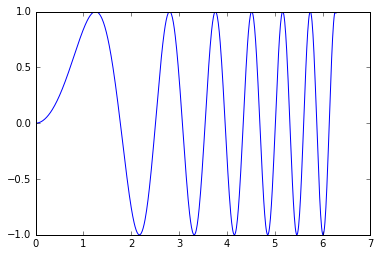

In [7]:
# plot the function
Fx = sym.lambdify(x,f,'numpy') # keyword numpy required to create vectorised function
plt.plot(x_vals, Fx(x_vals))

## Creating derivatives with SymPy

The first way to make the evaluation of the function with a Taylor series easier is, of course, to let SymPy do the hard work of doing the differentiation of the function:

In [8]:
f

In [9]:
dfdx = f.diff()
dfdx

In [10]:
d2fdx2 = dfdx.diff()
d3fdx3 = d2fdx2.diff()

In [11]:
d2fdx2

In [12]:
d3fdx3

# If you did the differentiation by hand before then you will surely appreciate how much SymPy can make your life easier...

However, for the determination of the full Taylor expansion, it even gets better:

## Taylor expansion up to order $n$

SymPy provides a direct method to determine the coefficients of a Taylor series for the polynomials up to order $n$. In addition, it is possible to directly plot and evaluate results:

In [13]:
taylor = sym.series(f, x0 = 1., n=6).removeO()
evaltaylor = sym.lambdify(x, taylor, modules=['numpy'])

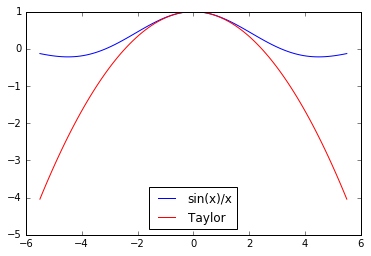

In [14]:
func = sym.sin(x)/x
taylor = sym.series(func, n=4).removeO()

evalfunc = sym.lambdify(x, func, modules=['numpy'])
evaltaylor = sym.lambdify(x, taylor, modules=['numpy'])

t = np.linspace(-5.5, 5.5, 100)
plt.plot(t, evalfunc(t), 'b', label='sin(x)/x')
plt.plot(t, evaltaylor(t), 'r', label='Taylor')
plt.legend(loc='best')
plt.show()

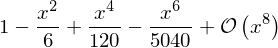

In [15]:
sym.series(func, n=8)  #.removeO()

In [16]:
f1 = sym.series(sym.sin(x), x0=sym.pi/4, n=4).removeO()

In [17]:
f1_np = sym.lambdify('x', f1, modules=['numpy'])

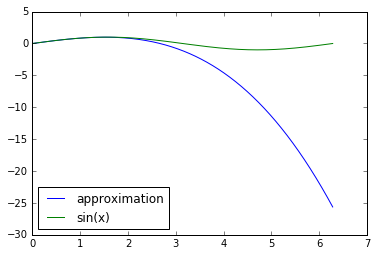

In [18]:
xvals = np.arange(0,2*np.pi,0.01)

plt.plot(xvals, f1_np(xvals), label = 'approximation')
plt.plot(xvals, np.sin(xvals), label = 'sin(x)')
plt.legend(loc='best')

In [21]:
x0 = np.pi/4.
dx = np.pi/8.
sym.var('x')

f1 = sym.series(sym.sin('x'), x0=0, n=2).removeO()
f1_np = sym.lambdify('x', f1, modules=['numpy'])

approx_val = f1_np(sym.pi/4. + sym.pi/8.)
true_val = np.sin(np.pi/4. + np.pi/8.)
error = (approx_val - true_val)/true_val

print(error)

#print(approx_val)

#print(f1)

-1.0 + 0.405897075109648*pi


## Complete function for Taylor series analysis

Here a little more complex example: a function that can be used to take any SymPy function as an input and then performes a plot of Taylor series for specified orders and ranges.

The function is from the IPython docs examples page (github repository on: https://github.com/ipython/ipython/blob/3607712653c66d63e0d7f13f073bde8c0f209ba8/docs/examples/notebooks/sympy.ipynb)

In [20]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)

Here an example:

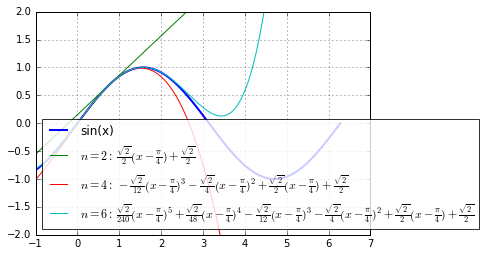

In [21]:
plot_taylor_approximations(sym.sin, sym.pi/4, [0,2, 4], (-1, 2*np.pi), (-2,2))

Pretty neat - and actually quite useful to get a quick idea about the radius of convergence for an expansion of an equation about a specific point.

## Accuracy estimation of Taylor Series Expansion

We know from theory that the accuracy of an approximation with a Taylor Series increses when we consider higher orders. This is actually really important for spatial discretisations of partial differential equations, as we will see in the lecture.

To get an understanding about the decreasing error, take the sine function approximations from above and write a function to determine the accuracy:

1. Define a location $x_0$ where we want to determine the gradient and a step size $\Delta x$. 

2. Determine the correct answer easily by differentiating the function. Based on that correct value (let's call it $y_{true}$, we can determine the error of the approximation with the value $y_{approx}$ by:

    $$\epsilon = \frac{y_{approx} - y_{true}}{y_{true}}$$

3. Generate several approximations for different locations $x_0$ and step sizes $\Delta x$. 

4. Analyse the decrease in the approximation error $\epsilon$ (for example in a plot).



In [ ]:
## Your code here: